In [1]:
##Data Collection
import pandas_datareader as pdr
key= "5eeba30cefe34745076bccdd468fa1096fa1bd91"

In [2]:
df = pdr.get_data_tiingo("AAPL", api_key = key)

In [3]:
df.to_csv("AAPL.csv")

In [4]:
import pandas as pd

In [5]:
df= pd.read_csv("AAPL.csv")

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-11-10 00:00:00+00:00,116.770,118.07,116.061,116.90,59127931,27.042599,27.343664,26.878402,27.072705,236511724,0.0,1.0
1,AAPL,2015-11-11 00:00:00+00:00,116.110,117.42,115.210,116.37,45217971,26.889750,27.193131,26.681320,26.949963,180871884,0.0,1.0
2,AAPL,2015-11-12 00:00:00+00:00,115.720,116.82,115.650,116.26,32525579,26.799431,27.054178,26.783219,26.924489,130102316,0.0,1.0
3,AAPL,2015-11-13 00:00:00+00:00,112.340,115.57,112.270,115.20,45812403,26.016661,26.764692,26.000450,26.679005,183249612,0.0,1.0
4,AAPL,2015-11-16 00:00:00+00:00,114.175,114.24,111.000,111.38,38106701,26.441626,26.456680,25.706333,25.794336,152426804,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2020-11-02 00:00:00+00:00,108.77,110.68,107.3200,109.11,122866899,108.582458,110.489164,107.134958,108.921871,122866899,0.000,1.0
1254,AAPL,2020-11-03 00:00:00+00:00,110.44,111.49,108.7300,109.66,107624448,110.249578,111.297768,108.542527,109.470923,107624448,0.000,1.0
1255,AAPL,2020-11-04 00:00:00+00:00,114.95,115.59,112.3500,114.14,138235482,114.751802,115.390699,112.156285,113.943199,138235482,0.000,1.0
1256,AAPL,2020-11-05 00:00:00+00:00,119.03,119.62,116.8686,117.95,126387074,118.824767,119.413750,116.667094,117.746629,126387074,0.000,1.0
1257,AAPL,2020-11-06 00:00:00+00:00,118.69,119.20,116.1300,118.32,114457922,118.690000,119.200000,116.130000,118.320000,114457922,0.205,1.0


In [8]:
df1 = df.reset_index()["close"]

In [9]:
df1.head()

0    116.770
1    116.110
2    115.720
3    112.340
4    114.175
Name: close, dtype: float64

In [10]:
df["high"]

0       118.07
1       117.42
2       116.82
3       115.57
4       114.24
         ...  
1253    110.68
1254    111.49
1255    115.59
1256    119.62
1257    119.20
Name: high, Length: 1258, dtype: float64

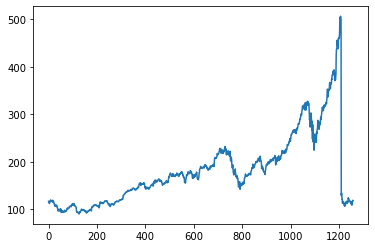

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
##LSTM are completely sensitive to the scale of the data. So we apply MInMax scalar

In [13]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
df1

array([[0.06357186],
       [0.06198437],
       [0.0610463 ],
       ...,
       [0.05919423],
       [0.06900782],
       [0.06819002]])

In [16]:
##splitting data into train ans test data
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(df1,test_size=0.33)

In [17]:
##cross validation and random seed will be used by regression model
##in time series, it's better to split the data accordingly
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
train_data.shape, test_data.shape

((817, 1), (441, 1))

In [19]:
test_data

array([[0.19023452],
       [0.19374624],
       [0.19203848],
       [0.19352977],
       [0.19261575],
       [0.19384245],
       [0.19648827],
       [0.19415514],
       [0.19874925],
       [0.20177992],
       [0.20202044],
       [0.2033193 ],
       [0.1991822 ],
       [0.20355983],
       [0.20567649],
       [0.20490679],
       [0.20247745],
       [0.19761876],
       [0.19860493],
       [0.21301263],
       [0.21784726],
       [0.2197715 ],
       [0.22463019],
       [0.23037883],
       [0.23494889],
       [0.231365  ],
       [0.23528563],
       [0.2519543 ],
       [0.24223692],
       [0.2366807 ],
       [0.23199038],
       [0.23603127],
       [0.23663259],
       [0.2395911 ],
       [0.24269393],
       [0.24938064],
       [0.25257968],
       [0.25339747],
       [0.25654841],
       [0.26400481],
       [0.26256164],
       [0.26525556],
       [0.26123873],
       [0.2610463 ],
       [0.26191221],
       [0.26196031],
       [0.27129284],
       [0.273

In [20]:
##in time series, the data will be depedent on the previous data, therefore
##time_step has to be taken, to specify,the independent data
import numpy as np
##convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] ##i=0  0,1,2,3,.......99  o/p=100
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX),np.array(dataY)

In [21]:
##reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [22]:
x_train.shape, y_train.shape

((716, 100), (716,))

In [23]:
##reshape input to be [samples, time steps, features] which is required for LSTM
##convert to 3 dimensions
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [24]:
## create a stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 544ms/step - loss: 0.0093 - val_loss: 0.0547
Epoch 2/100
12/12 [==============================] - 3s 276ms/step - loss: 0.0020 - val_loss: 0.0205
Epoch 3/100
12/12 [==============================] - 3s 245ms/step - loss: 5.8596e-04 - val_loss: 0.0225
Epoch 4/100
12/12 [==============================] - 3s 271ms/step - loss: 4.3088e-04 - val_loss: 0.0191
Epoch 5/100
12/12 [==============================] - 3s 250ms/step - loss: 3.5573e-04 - val_loss: 0.0187
Epoch 6/100
12/12 [==============================] - 3s 279ms/step - loss: 3.3467e-04 - val_loss: 0.0184
Epoch 7/100
12/12 [==============================] - 3s 270ms/step - loss: 3.3749e-04 - val_loss: 0.0178
Epoch 8/100
12/12 [==============================] - 3s 260ms/step - loss: 3.2585e-04 - val_loss: 0.0174
Epoch 9/100
12/12 [==============================] - 3s 270ms/step - loss: 3.0346e-04 - val_loss: 0.0172
Epoch 10/100
12/12 [==============================] - 3s 256ms/

12/12 [==============================] - 3s 273ms/step - loss: 1.2299e-04 - val_loss: 0.0088
Epoch 79/100
12/12 [==============================] - 3s 268ms/step - loss: 1.2349e-04 - val_loss: 0.0083
Epoch 80/100
12/12 [==============================] - 3s 281ms/step - loss: 1.3607e-04 - val_loss: 0.0083
Epoch 81/100
12/12 [==============================] - 3s 269ms/step - loss: 1.3430e-04 - val_loss: 0.0087
Epoch 82/100
12/12 [==============================] - 3s 278ms/step - loss: 1.1768e-04 - val_loss: 0.0080
Epoch 83/100
12/12 [==============================] - 3s 282ms/step - loss: 1.2249e-04 - val_loss: 0.0084
Epoch 84/100
12/12 [==============================] - 3s 267ms/step - loss: 1.2390e-04 - val_loss: 0.0078
Epoch 85/100
12/12 [==============================] - 3s 286ms/step - loss: 1.4720e-04 - val_loss: 0.0092
Epoch 86/100
12/12 [==============================] - 3s 278ms/step - loss: 1.4644e-04 - val_loss: 0.0073
Epoch 87/100
12/12 [==============================] - 3s 26

In [28]:
x_test[0].shape

(100, 1)

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.3.1'

In [31]:
###Lets ddo the prediction and check the performance matrix
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [32]:
##transformback to original form where you changed the scale
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [33]:
###calculate the RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

In [34]:
math.sqrt(mean_squared_error(y_train,train_pred))

154.00118327415652

In [35]:
math.sqrt(mean_squared_error(y_test,test_pred))

267.6477368707692

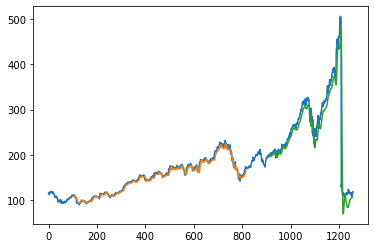

In [36]:
###plotting
###shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1) ##It removes all  the decimal points

trainPredictPlot[:, :] = np.nan ##assign nan

trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred

##shift test prediction for plotting
testPredictPlot = np.empty_like(df1)

testPredictPlot[:,:] = np.nan

testPredictPlot[len(train_pred)+(look_back*2)+1:len(df1)-1, :] = test_pred

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
trainPredictPlot.shape

(1258, 1)

In [38]:
len(train_pred)

716

In [39]:
train_pred

array([[107.96921 ],
       [108.55979 ],
       [108.90875 ],
       [109.00219 ],
       [108.92279 ],
       [108.84456 ],
       [108.93766 ],
       [109.21404 ],
       [109.46539 ],
       [109.457375],
       [109.14561 ],
       [108.63611 ],
       [107.98311 ],
       [107.27348 ],
       [106.565834],
       [105.884895],
       [104.86904 ],
       [103.370636],
       [101.51051 ],
       [ 99.554344],
       [ 97.850006],
       [ 96.5075  ],
       [ 95.501686],
       [ 94.77071 ],
       [ 94.27379 ],
       [ 94.00615 ],
       [ 93.8686  ],
       [ 93.66866 ],
       [ 93.375206],
       [ 93.21911 ],
       [ 93.23044 ],
       [ 93.43217 ],
       [ 93.74156 ],
       [ 94.13488 ],
       [ 94.623085],
       [ 95.23637 ],
       [ 96.011154],
       [ 96.90973 ],
       [ 97.817215],
       [ 98.59439 ],
       [ 99.08347 ],
       [ 99.22271 ],
       [ 99.08366 ],
       [ 98.81681 ],
       [ 98.550285],
       [ 98.34036 ],
       [ 98.24909 ],
       [ 98.2

In [40]:
x = np.empty_like(df1)
x.shape
x[:,:]=np.nan
x
x[100:817,:]=train_pred

ValueError: could not broadcast input array from shape (716,1) into shape (717,1)

In [41]:
##to take previous 100 data to predict next 30 days stock
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [42]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [43]:
temp_input

[0.628719182200842,
 0.6238845460012028,
 0.6458929645219482,
 0.6643174984966926,
 0.6487552615754661,
 0.6602525556223691,
 0.6332892363199039,
 0.6528923631990378,
 0.6601563439567049,
 0.6584966927239928,
 0.6584966927239928,
 0.6819242333132893,
 0.6791340950090199,
 0.7000120264582081,
 0.7039567047504509,
 0.7055682501503309,
 0.7013108839446784,
 0.7165123271196634,
 0.7229344558027659,
 0.7113650030066145,
 0.7094888755261575,
 0.7290198436560433,
 0.7159591100420926,
 0.7185808779314491,
 0.6759831629585087,
 0.673770294648226,
 0.6948887552615755,
 0.6799037883343355,
 0.6971016235718581,
 0.7081659651232712,
 0.8050511124473845,
 0.830811785929044,
 0.8378111846061336,
 0.841635598316296,
 0.8785808779314492,
 0.8517378232110644,
 0.8672760072158752,
 0.8350210463018641,
 0.8699939867708961,
 0.8892363199037885,
 0.8882501503307276,
 0.8853638003607938,
 0.89455201443175,
 0.8959470835838845,
 0.9206494287432352,
 0.9792904389657247,
 0.9936019242333134,
 0.9836680697534577

In [44]:
len(temp_input)

100

In [45]:
##demonstrate prediction for next 30 days

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.04387896]
101
1 day input [0.62388455 0.64589296 0.6643175  0.64875526 0.66025256 0.63328924
 0.65289236 0.66015634 0.65849669 0.65849669 0.68192423 0.6791341
 0.70001203 0.7039567  0.70556825 0.70131088 0.71651233 0.72293446
 0.711365   0.70948888 0.72901984 0.71595911 0.71858088 0.67598316
 0.67377029 0.69488876 0.67990379 0.69710162 0.70816597 0.80505111
 0.83081179 0.83781118 0.8416356  0.87858088 0.85173782 0.86727601
 0.83502105 0.86999399 0.88923632 0.88825015 0.8853638  0.89455201
 0.89594708 0.92064943 0.97929044 0.99360192 0.98366807 1.
 0.98544799 0.9834997  0.09308479 0.10544799 0.09876127 0.07345761
 0.07365003 0.05407096 0.06489477 0.0556825  0.05209862 0.06016837
 0.06061335 0.0524113  0.04810583 0.03968731 0.04748046 0.05164161
 0.04036079 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278
 0.06361996 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233
 0.06405292 0.08192423 0.07398677 0.07420325 0.07304871 0.06898376
 0.06167168 0.06535177 0.06381239 0.061118

8 day output [[0.04419517]]
9 day input [0.65849669 0.65849669 0.68192423 0.6791341  0.70001203 0.7039567
 0.70556825 0.70131088 0.71651233 0.72293446 0.711365   0.70948888
 0.72901984 0.71595911 0.71858088 0.67598316 0.67377029 0.69488876
 0.67990379 0.69710162 0.70816597 0.80505111 0.83081179 0.83781118
 0.8416356  0.87858088 0.85173782 0.86727601 0.83502105 0.86999399
 0.88923632 0.88825015 0.8853638  0.89455201 0.89594708 0.92064943
 0.97929044 0.99360192 0.98366807 1.         0.98544799 0.9834997
 0.09308479 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096
 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113
 0.04810583 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661
 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996 0.05455201
 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423
 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177
 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438
 0.06008419 0.044546   0.

16 day output [[0.0408579]]
17 day input [0.71651233 0.72293446 0.711365   0.70948888 0.72901984 0.71595911
 0.71858088 0.67598316 0.67377029 0.69488876 0.67990379 0.69710162
 0.70816597 0.80505111 0.83081179 0.83781118 0.8416356  0.87858088
 0.85173782 0.86727601 0.83502105 0.86999399 0.88923632 0.88825015
 0.8853638  0.89455201 0.89594708 0.92064943 0.97929044 0.99360192
 0.98366807 1.         0.98544799 0.9834997  0.09308479 0.10544799
 0.09876127 0.07345761 0.07365003 0.05407096 0.06489477 0.0556825
 0.05209862 0.06016837 0.06061335 0.0524113  0.04810583 0.03968731
 0.04748046 0.05164161 0.04036079 0.04300661 0.0527721  0.05921828
 0.05712568 0.06126278 0.06361996 0.05455201 0.06292243 0.05488876
 0.05950692 0.05924233 0.06405292 0.08192423 0.07398677 0.07420325
 0.07304871 0.06898376 0.06167168 0.06535177 0.06381239 0.06111846
 0.0594107  0.05943476 0.06316296 0.05017438 0.06008419 0.044546
 0.04432952 0.04834636 0.05919423 0.06900782 0.06819002 0.04387896
 0.04666512 0.0480315  0

25 day output [[0.03955324]]
26 day input [0.69488876 0.67990379 0.69710162 0.70816597 0.80505111 0.83081179
 0.83781118 0.8416356  0.87858088 0.85173782 0.86727601 0.83502105
 0.86999399 0.88923632 0.88825015 0.8853638  0.89455201 0.89594708
 0.92064943 0.97929044 0.99360192 0.98366807 1.         0.98544799
 0.9834997  0.09308479 0.10544799 0.09876127 0.07345761 0.07365003
 0.05407096 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335
 0.0524113  0.04810583 0.03968731 0.04748046 0.05164161 0.04036079
 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996
 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292
 0.08192423 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168
 0.06535177 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296
 0.05017438 0.06008419 0.044546   0.04432952 0.04834636 0.05919423
 0.06900782 0.06819002 0.04387896 0.04666512 0.0480315  0.04823451
 0.04771652 0.04685704 0.04590748 0.04500112 0.04419517 0.0435015
 0.04291248 0.0424144

In [46]:
x_input = x_input.reshape((1, 100,1))
yhat = model.predict(x_input, verbose=0)
yhat[0]

array([0.03897151], dtype=float32)

In [47]:
temp_input.extend(yhat[0].tolist())
temp_input

[0.7081659651232712,
 0.8050511124473845,
 0.830811785929044,
 0.8378111846061336,
 0.841635598316296,
 0.8785808779314492,
 0.8517378232110644,
 0.8672760072158752,
 0.8350210463018641,
 0.8699939867708961,
 0.8892363199037885,
 0.8882501503307276,
 0.8853638003607938,
 0.89455201443175,
 0.8959470835838845,
 0.9206494287432352,
 0.9792904389657247,
 0.9936019242333134,
 0.9836680697534577,
 1.0,
 0.9854479855682503,
 0.983499699338545,
 0.09308478653036678,
 0.10544798556825014,
 0.09876127480457003,
 0.07345760673481655,
 0.07365003006614551,
 0.05407095610342749,
 0.06489476849067943,
 0.055682501503307225,
 0.052098616957306054,
 0.0601683704149128,
 0.06061334936861096,
 0.05241130487071555,
 0.04810583283223091,
 0.03968731208659049,
 0.04748045700541187,
 0.05164161154539987,
 0.04036079374624174,
 0.04300661455201443,
 0.05277209861695731,
 0.05921828021647624,
 0.05712567648827421,
 0.06126277811184605,
 0.06361996392062536,
 0.05455201443174984,
 0.062922429344558,
 0.054888

In [48]:
x_input=np.array(temp_input[1:])
x_input

array([0.80505111, 0.83081179, 0.83781118, 0.8416356 , 0.87858088,
       0.85173782, 0.86727601, 0.83502105, 0.86999399, 0.88923632,
       0.88825015, 0.8853638 , 0.89455201, 0.89594708, 0.92064943,
       0.97929044, 0.99360192, 0.98366807, 1.        , 0.98544799,
       0.9834997 , 0.09308479, 0.10544799, 0.09876127, 0.07345761,
       0.07365003, 0.05407096, 0.06489477, 0.0556825 , 0.05209862,
       0.06016837, 0.06061335, 0.0524113 , 0.04810583, 0.03968731,
       0.04748046, 0.05164161, 0.04036079, 0.04300661, 0.0527721 ,
       0.05921828, 0.05712568, 0.06126278, 0.06361996, 0.05455201,
       0.06292243, 0.05488876, 0.05950692, 0.05924233, 0.06405292,
       0.08192423, 0.07398677, 0.07420325, 0.07304871, 0.06898376,
       0.06167168, 0.06535177, 0.06381239, 0.06111846, 0.0594107 ,
       0.05943476, 0.06316296, 0.05017438, 0.06008419, 0.044546  ,
       0.04432952, 0.04834636, 0.05919423, 0.06900782, 0.06819002,
       0.04387896, 0.04666512, 0.0480315 , 0.04823451, 0.04771

In [49]:
day_new = np.arange(1,101)
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [51]:
day_pred = np.arange(101,131)
day_pred

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130])

In [52]:
len(df1)

1258

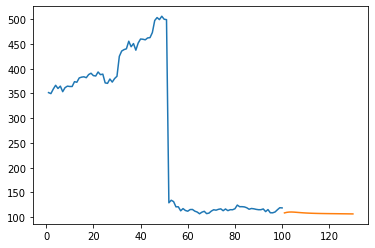

In [53]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

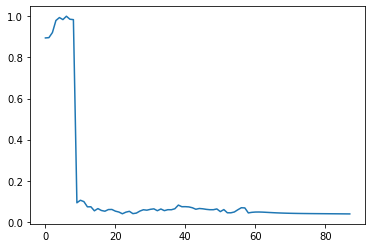

In [54]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


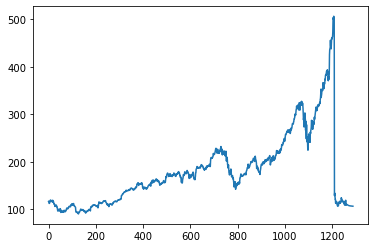

In [55]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)